**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: Carolina Valle Gutiérrez
*   MATRÍCULA: A01734834

In [69]:
#Esto es para hacerlo desde google colab
#from google.colab import drive
#drive.mount('/content/drive')
#import os
#DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 4/Actividad4_EDA"
#os.chdir(DIR)

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv("D:\Caro\cienciadedatos\credit_risk_dataset.csv")
df

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\cavag\AppData\Local\Temp\ipykernel_22720\543458193.py:1: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv("D:\Caro\cienciadedatos\credit_risk_dataset.csv")


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Parte 1**. Análisis descriptivo (univariante)

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas?

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


 Las columnas numéricas generalmente serán de tipo int64 o float64, mientras que las cualitativas serán de tipo object. Como podemos observar hay 8 numéricas y 4 cualitativas.

In [73]:
# Contar columnas numéricas y cualitativas
num = df.select_dtypes(include=['number']).shape[1]
qual = df.select_dtypes(include=['object']).shape[1]

print(f'Número de columnas numéricas: {num}')
print(f'Número de columnas cualitativas: {qual}')


Número de columnas numéricas: 8
Número de columnas cualitativas: 4


 2. Determina el porcentaje de valores faltantes por columna.

In [74]:
faltante = df.isnull().mean() * 100
print(faltante)

#Esta función crea un DataFrame del mismo tamaño que df
#donde cada valor es True si el valor original es NaN 
# (Not a Number, que representa un valor faltante) y False si el valor está presente.

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64


# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_int_rate` según los valores observados de asimetría y curtosis

**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%)

In [75]:
# Obtener estadísticas descriptivas
descrip = df.describe()
print(descrip)

         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%   

In [76]:

# Seleccionar solo columnas numéricas
num_df = df.select_dtypes(include=['number'])

# Calcular asimetría y curtosis
asimetria = num_df.skew()
curtosis = num_df.kurt()

# Mostrar los resultados
print("Asimetría:\n", skewness)
print("\nCurtosis:\n", kurtosis)

# Clasificar variables según asimetría y curtosis
for variable in ['person_age', 'loan_int_rate']:
    asi = asimetria[variable]
    cur = curtosis[variable]
    
    if asi > 0:
        asi_label = "Sesgada a la derecha"
    elif asi < 0:
        asi_label = "Sesgada a la izquierda"
    else:
        asi_label = "Simétrica"
        
    if cur > 0:
        cur_label = "Leptocúrtica"
    elif cur < 0:
        cur_label = "Platicúrtica"
    else:
        cur_label = "Mesocúrtica"
        
    print(f"\nVariable: {variable} - Asimetría: {asi_label}, Curtosis: {cur_label}")

Asimetría:
 person_age                     2.581393
person_income                 32.865349
person_emp_length              2.614455
loan_amnt                      1.192477
loan_int_rate                  0.208550
loan_status                    1.364888
loan_percent_income            1.064669
cb_person_cred_hist_length     1.661790
dtype: float64

Curtosis:
 person_age                      18.560825
person_income                 2693.272776
person_emp_length               43.722338
loan_amnt                        1.423565
loan_int_rate                   -0.671609
loan_status                     -0.137088
loan_percent_income              1.223687
cb_person_cred_hist_length       3.716194
dtype: float64

Variable: person_age - Asimetría: Sesgada a la derecha, Curtosis: Leptocúrtica

Variable: loan_int_rate - Asimetría: Sesgada a la derecha, Curtosis: Platicúrtica


4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable.
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.

**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma.

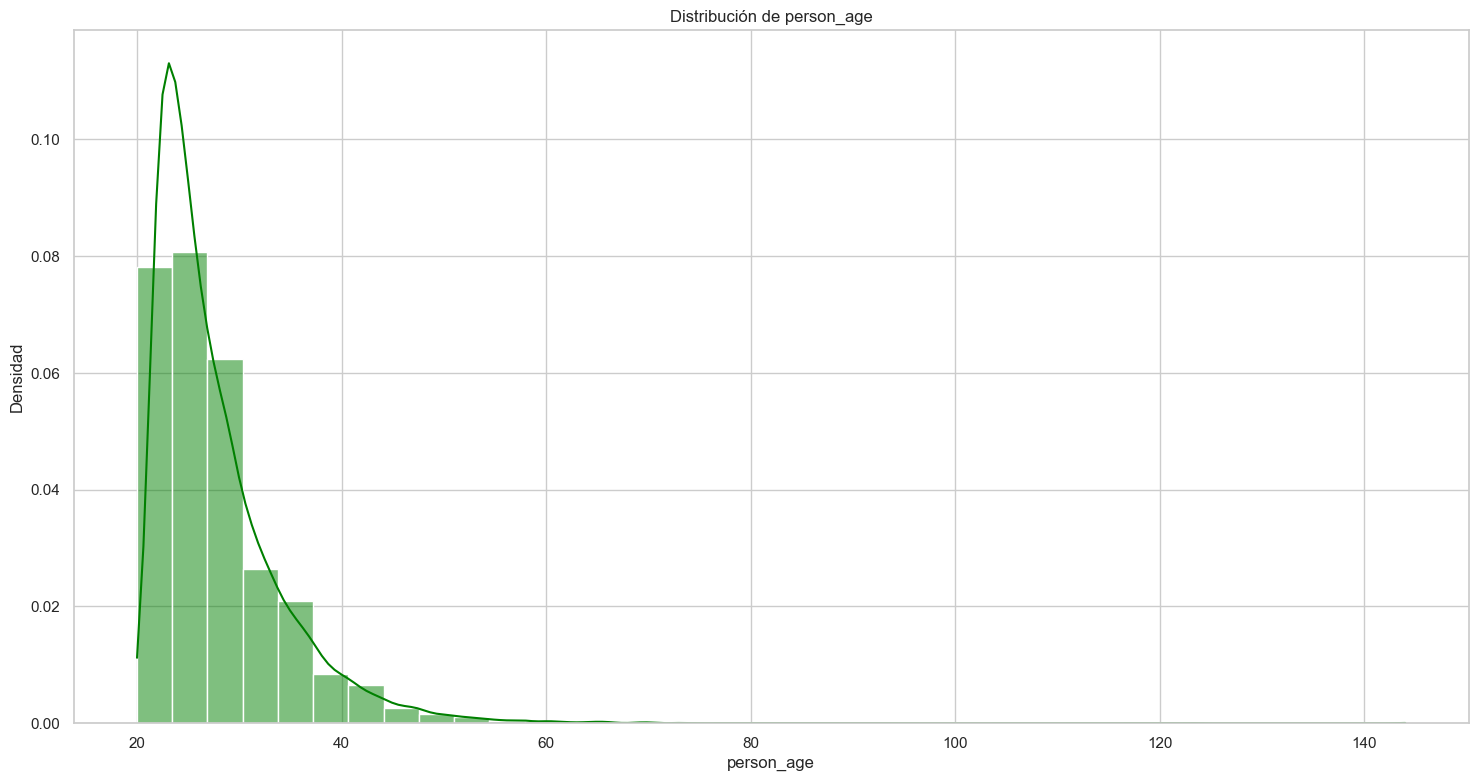

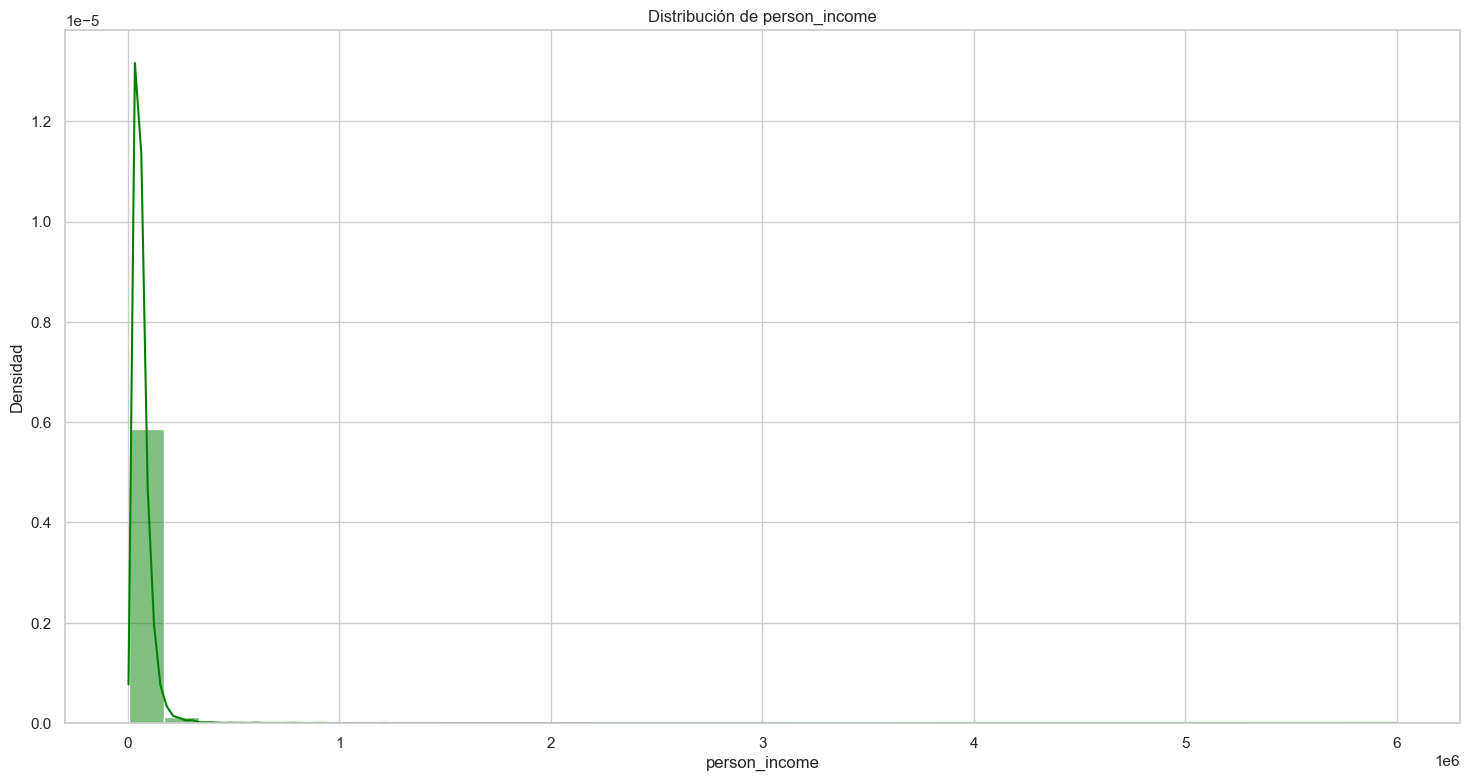

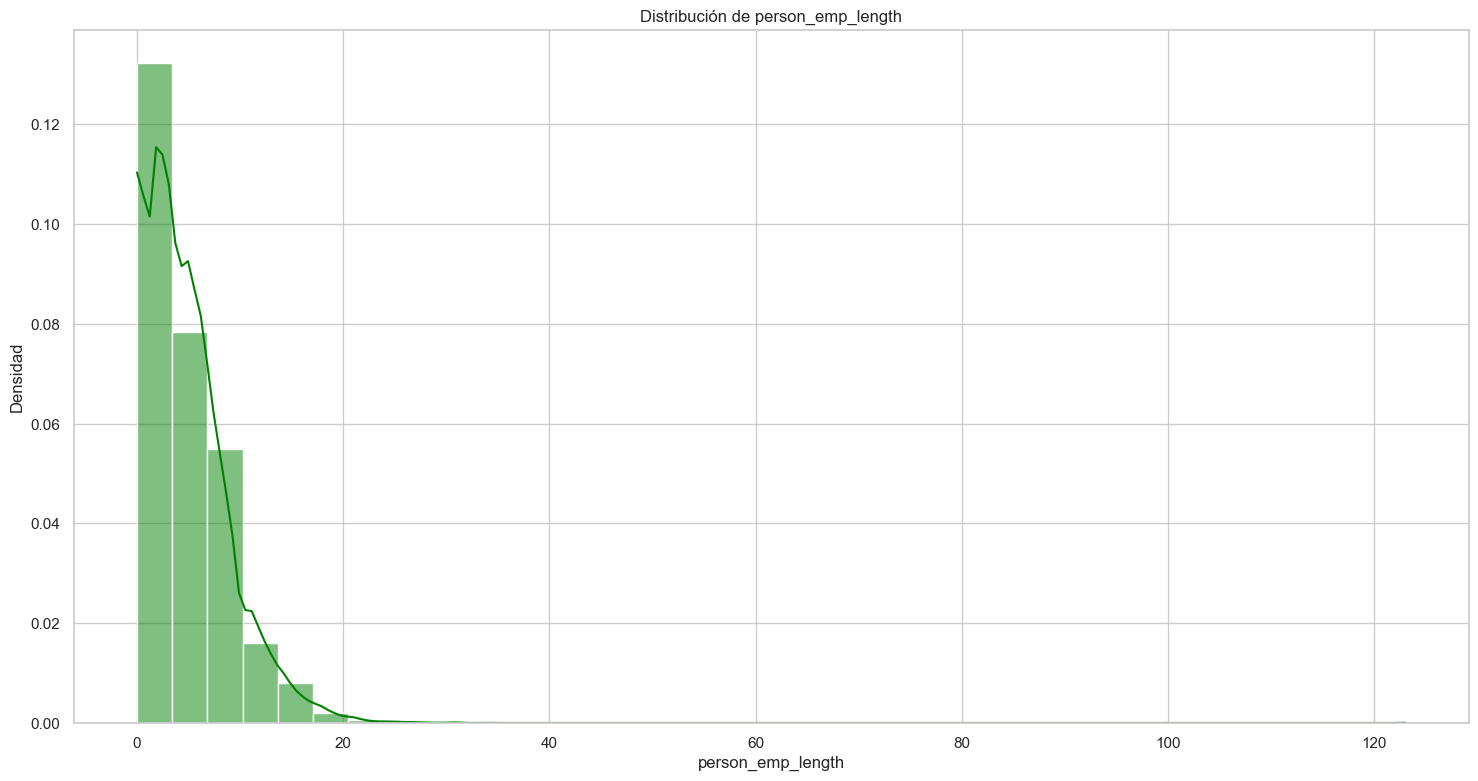

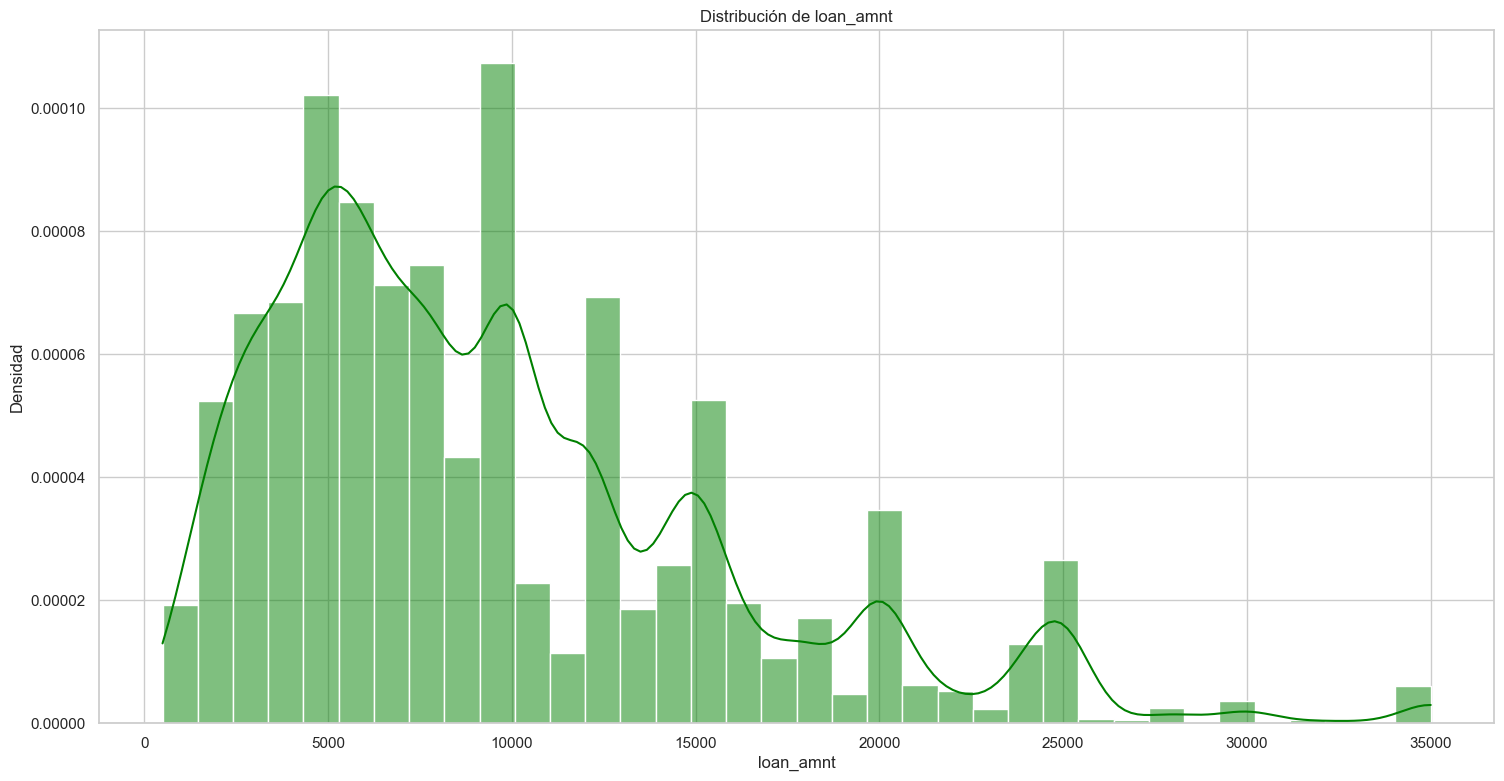

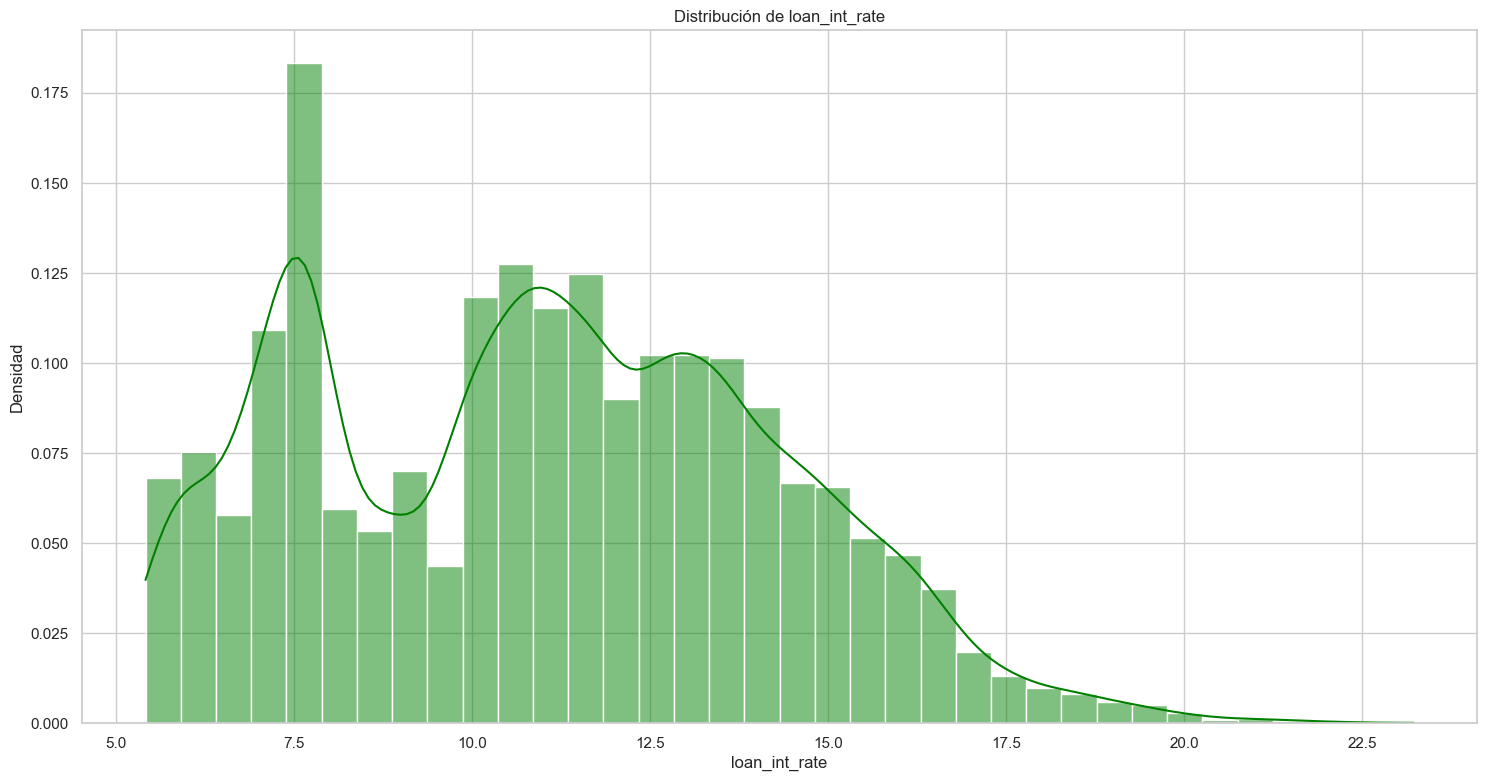

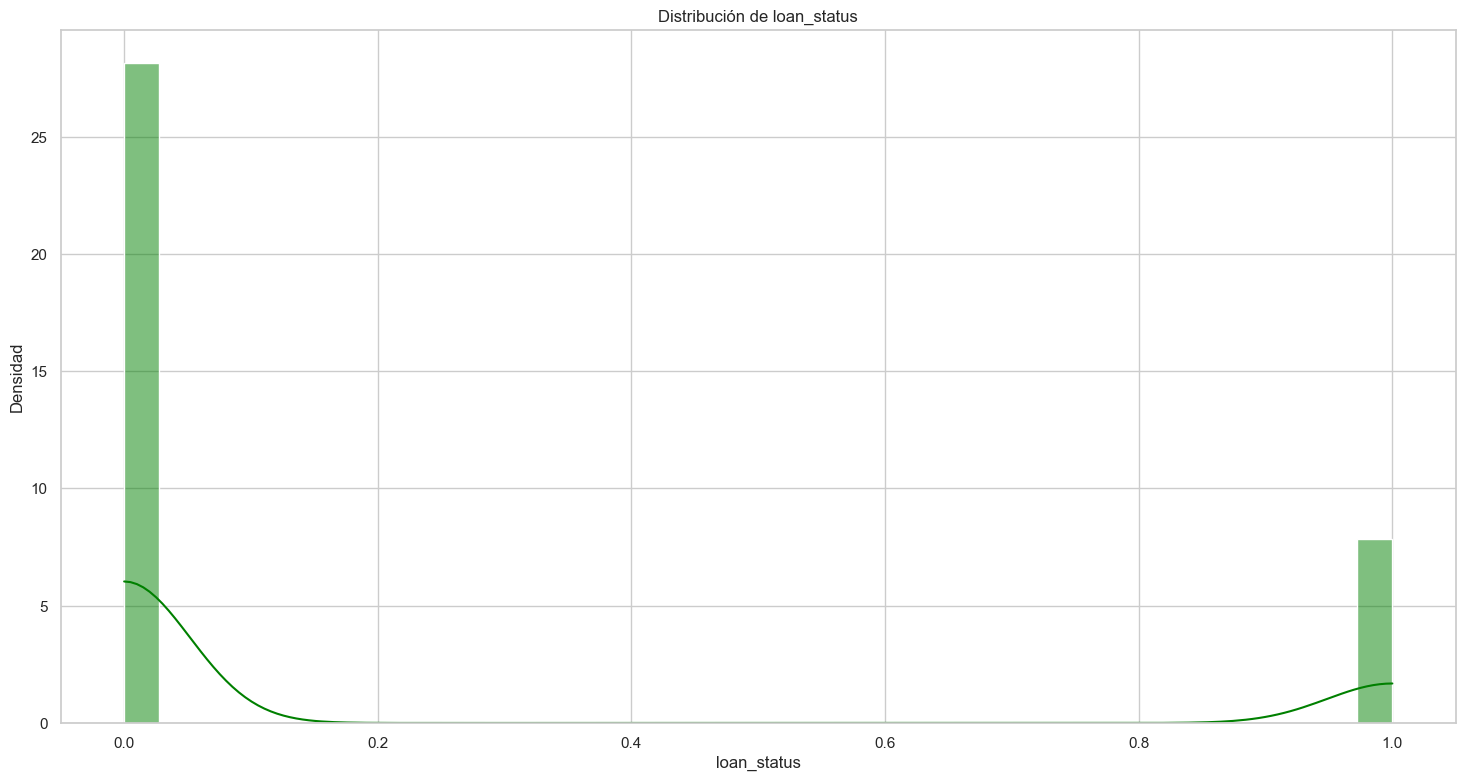

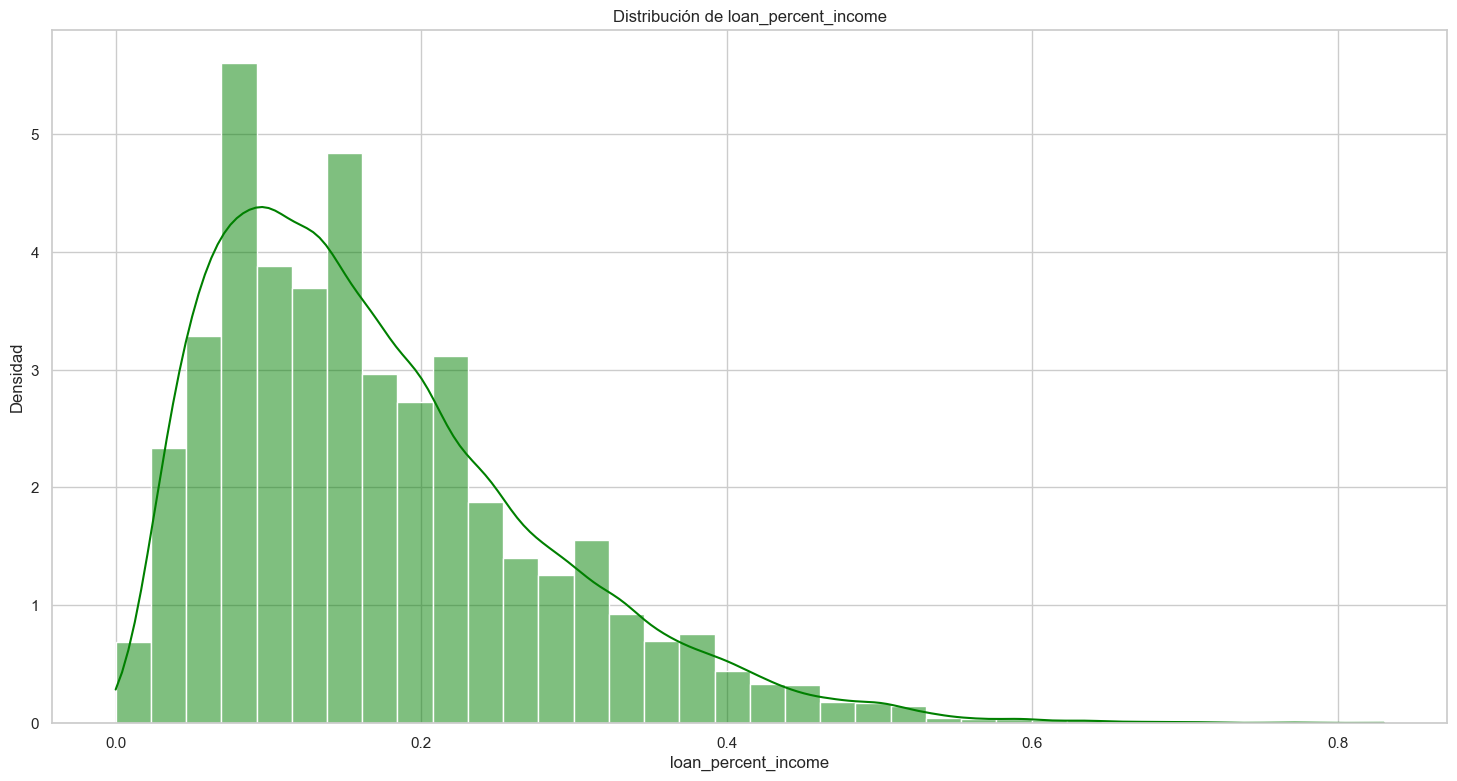

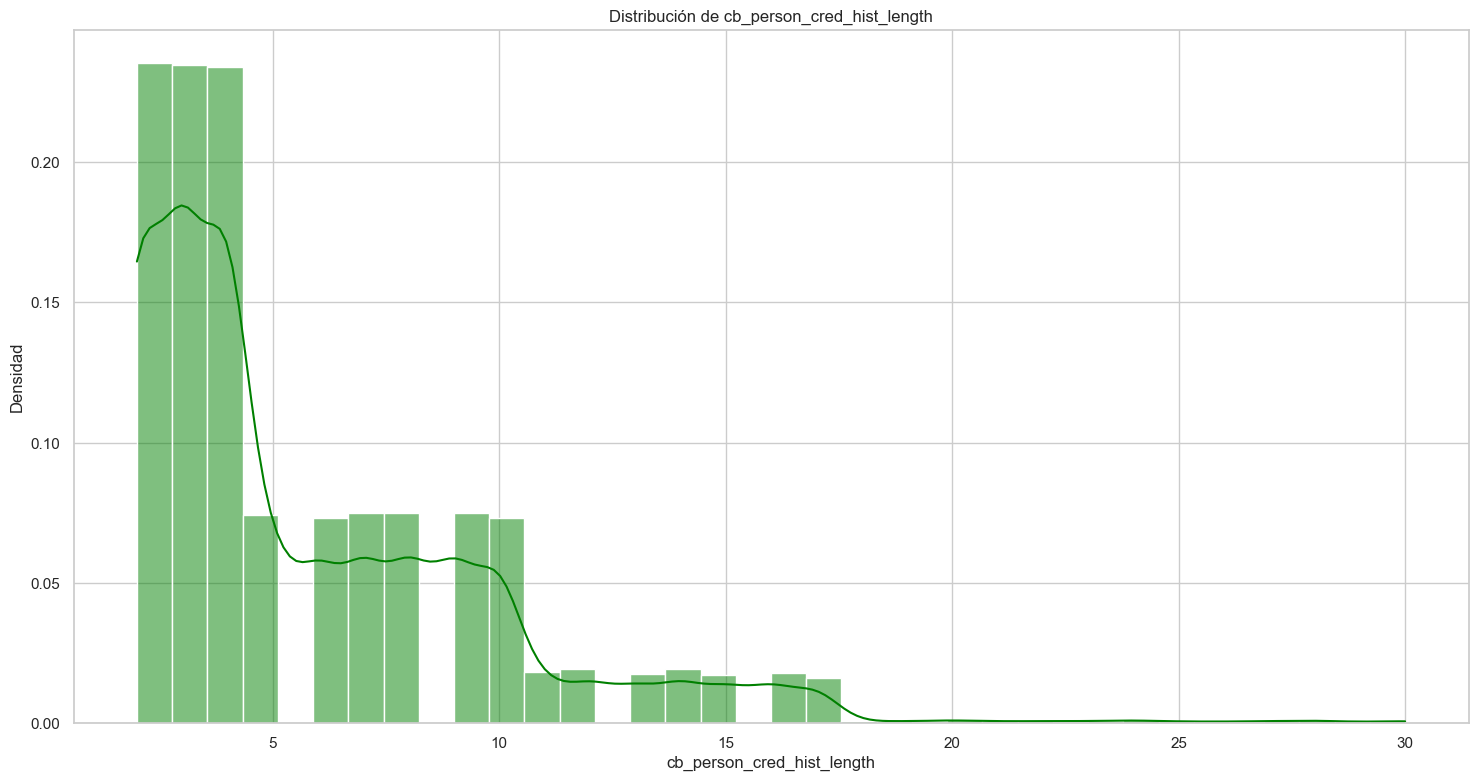

In [77]:
# Estilo de los gráfico
sns.set(style="whitegrid")

# Histogramas y gráficos de densidad
for column in numeric_df.columns:
    plt.figure(figsize=(18, 9))
    sns.histplot(numeric_df[column], kde=True, bins=36, color='green', stat="density")
    
    # Formato
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Densidad')
    plt.show()


5. Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles.

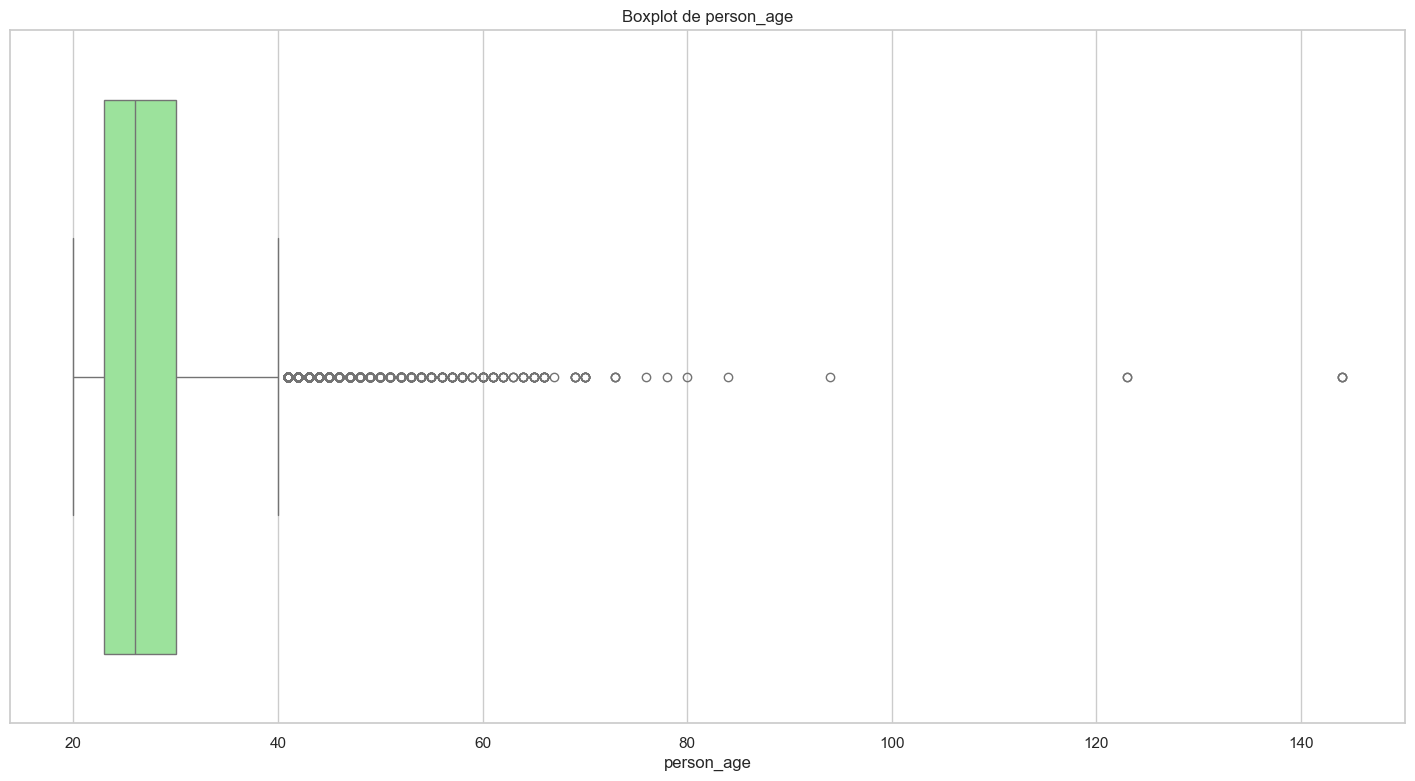

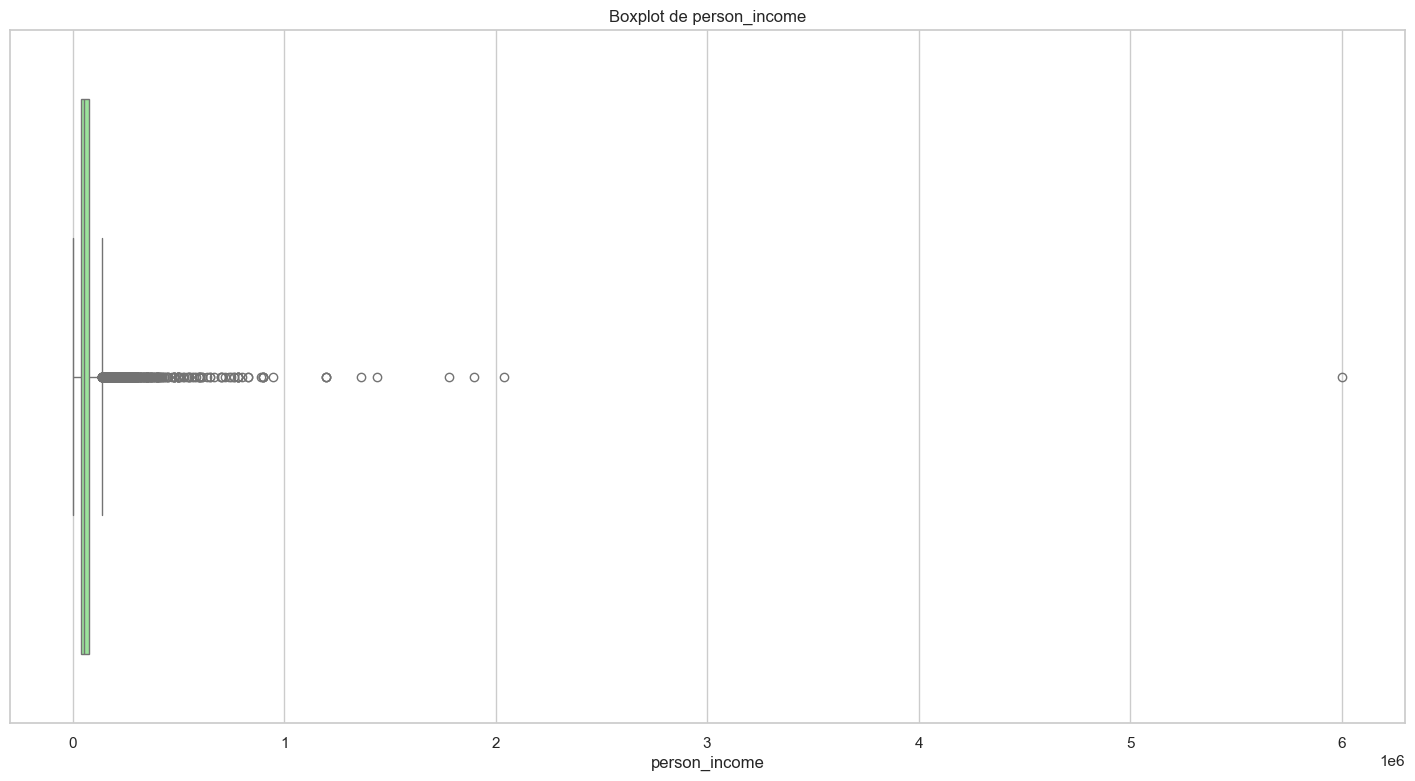

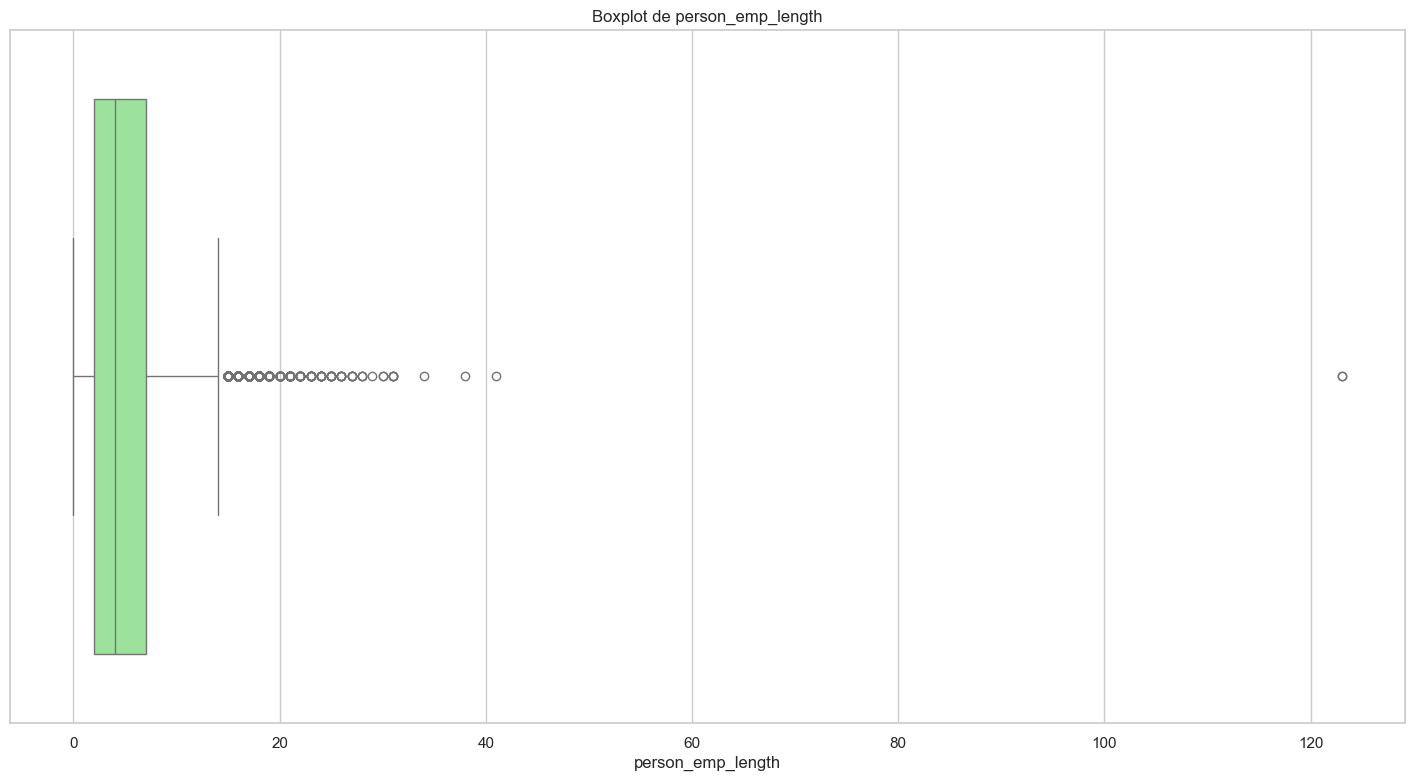

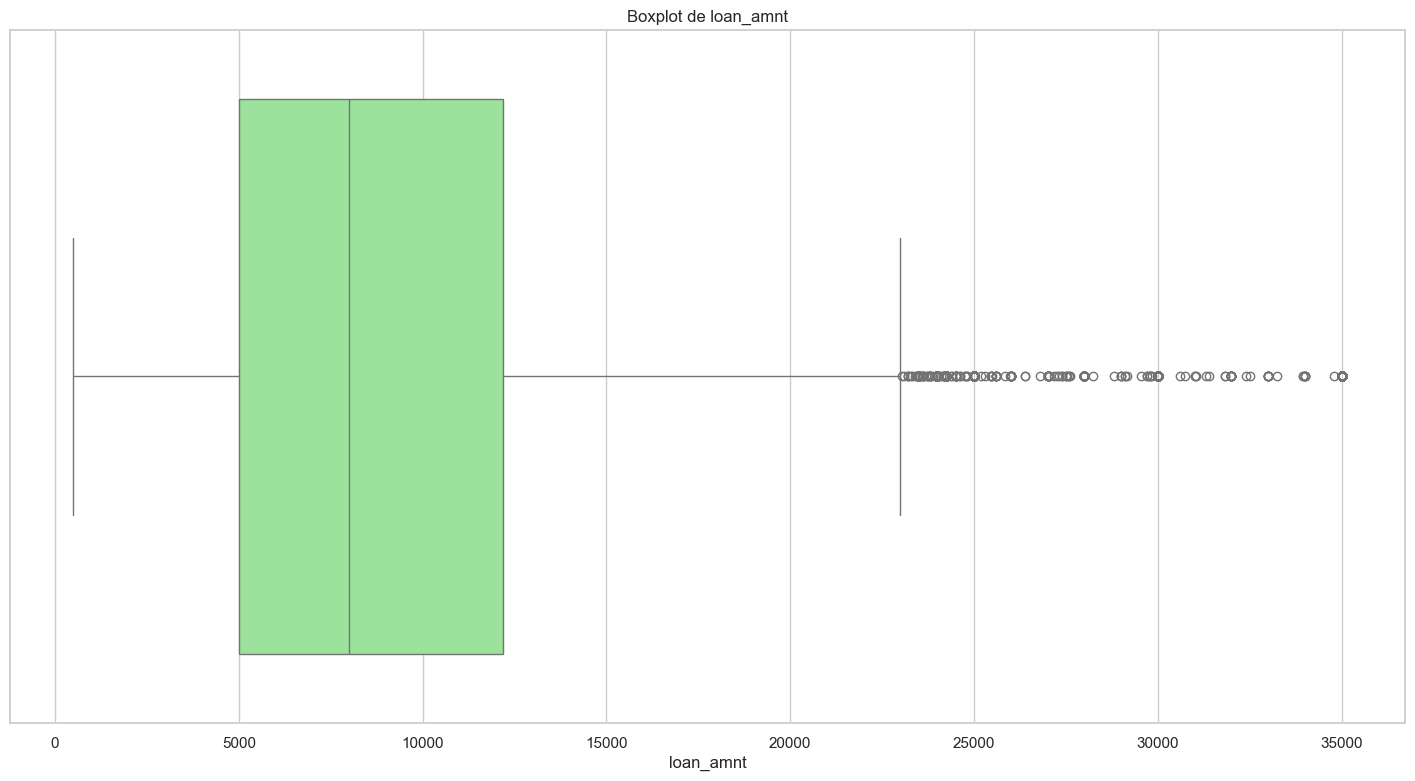

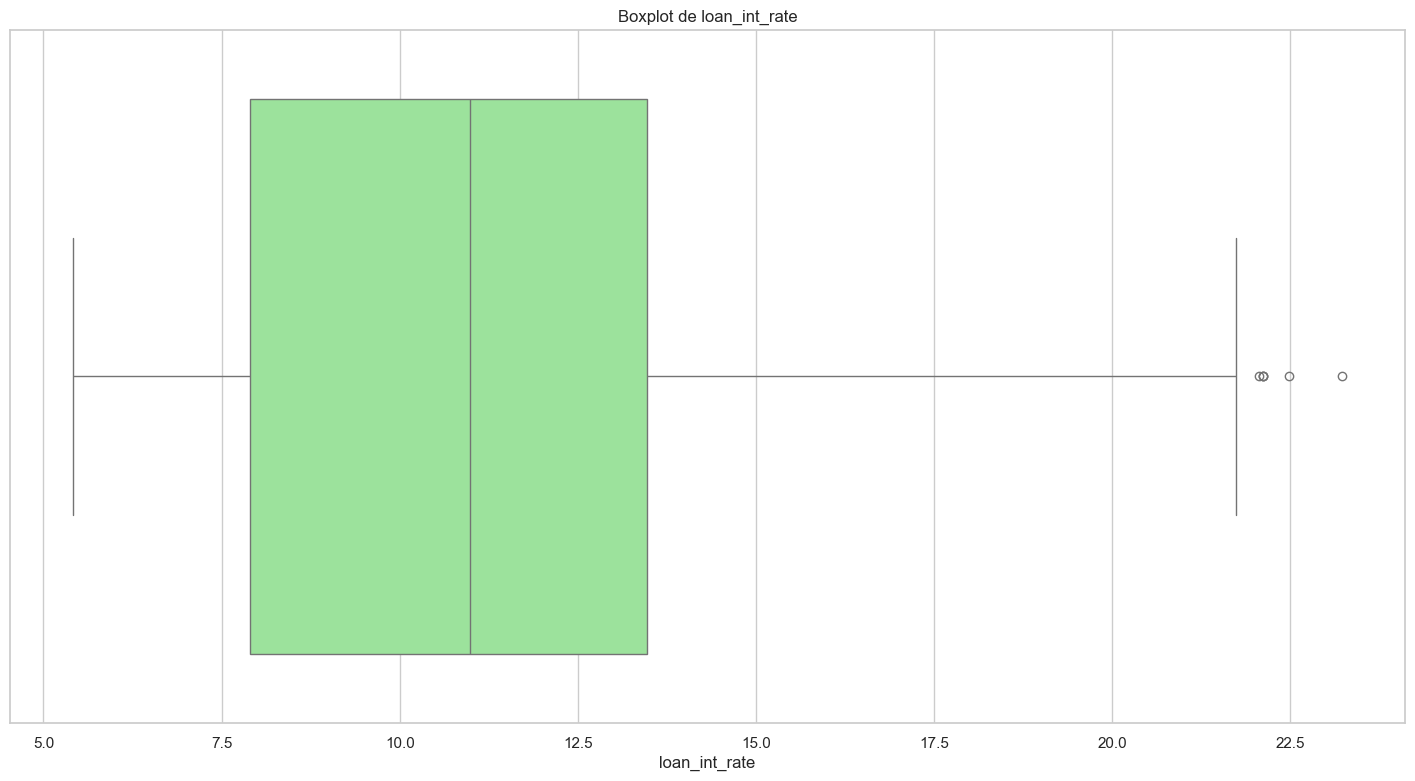

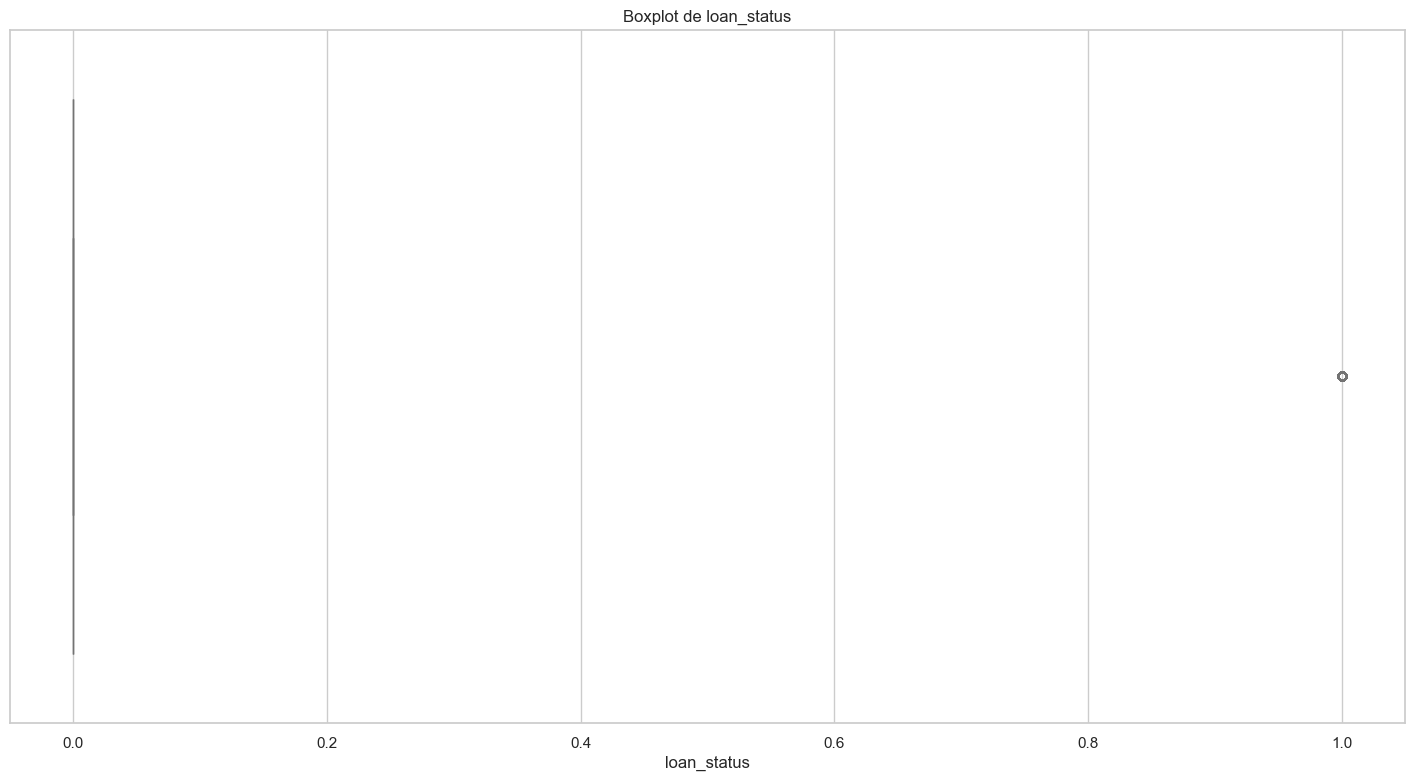

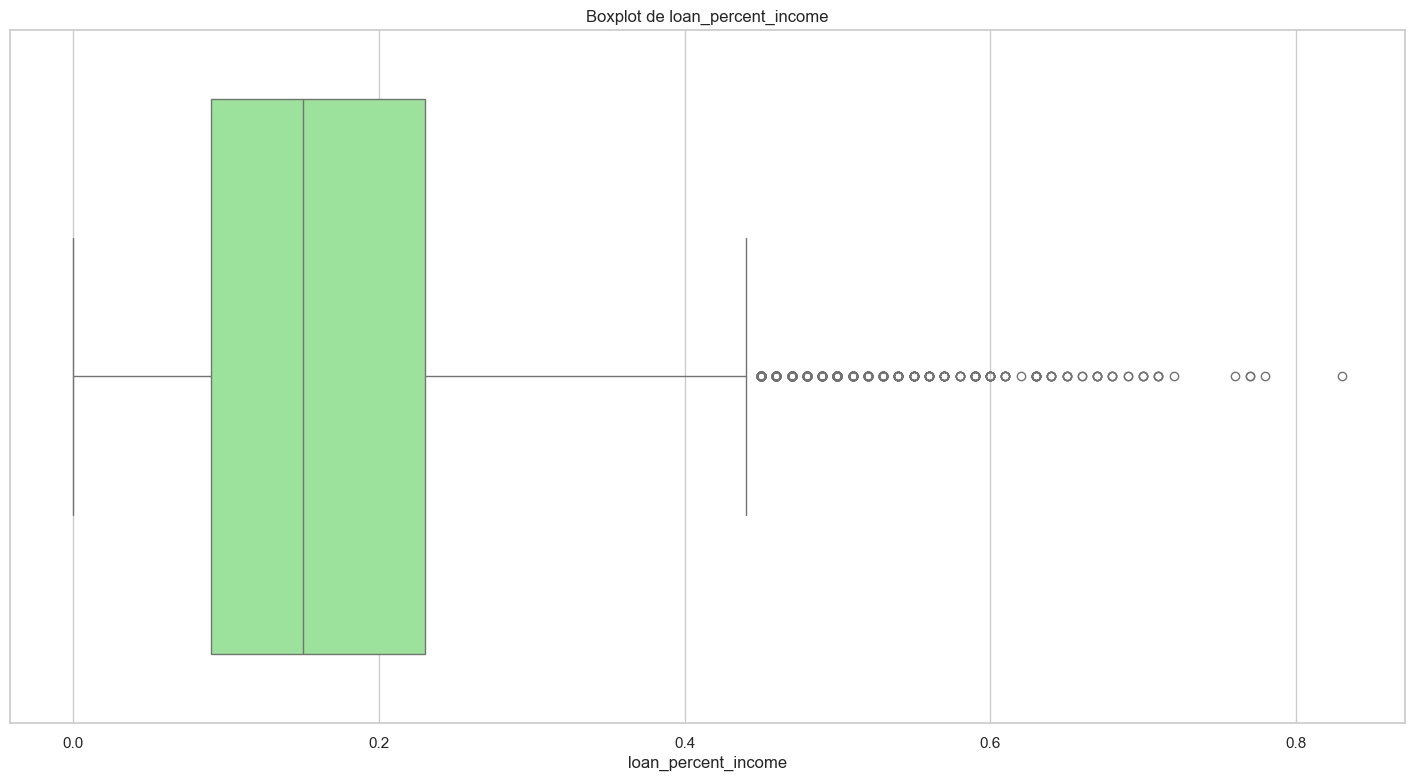

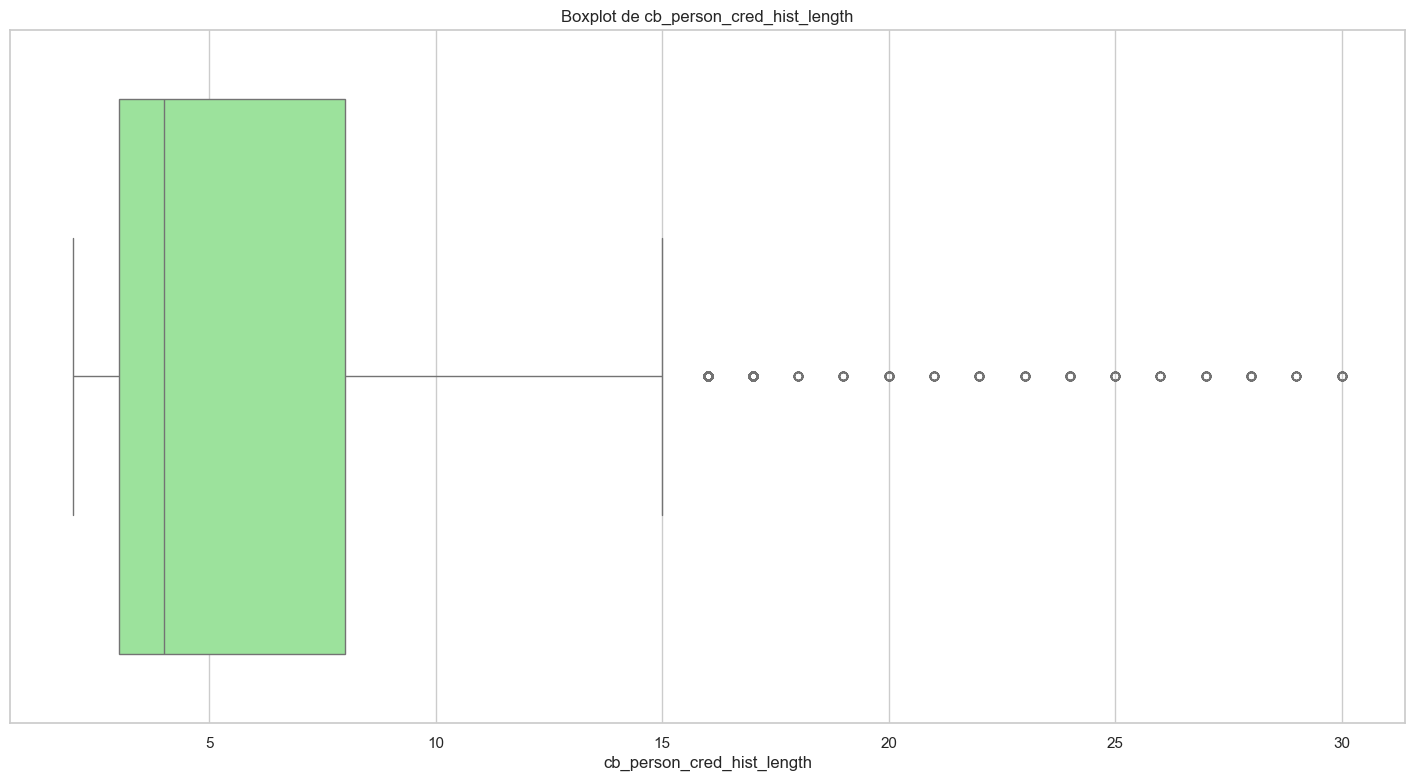

In [78]:
# Estilo de los gráficos
sns.set(style="whitegrid")

# Boxplots
for column in numeric_df.columns:
    plt.figure(figsize=(18, 9))
    sns.boxplot(x=numeric_df[column], color='lightgreen')
    
    # Formato de gráfico
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)
    plt.show()


*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

In [79]:
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Análisis de variables de texto

 6. Obtén las siguientes estadísticas descriptivas para todas las variables de texto:
*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)

**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object: `describe(include = 'object')`. Para los recuentos utiliza la función `df['columna'].value_counts()`

In [80]:
# Estadísticas descriptivas para variables de tipo texto
stats = df.describe(include='object')
print(stats)

modas = df.mode().iloc[0] #Tendencia central (moda)
card = df.nunique() #cardinalidad (cantidad de valores únicos)

# Mostrar resultados
print("\nModas:\n", modas)
print("\nCardinalidad (cantidad de valores únicos):\n", card)

# Recuentos únicos para cada columna 
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nRecuento único para {col}:\n", df[col].value_counts())



       person_home_ownership loan_intent loan_grade cb_person_default_on_file
count                  32581       32581      32581                     32581
unique                     4           6          7                         2
top                     RENT   EDUCATION          A                         N
freq                   16446        6453      10777                     26836

Modas:
 person_age                           23
person_income                     60000
person_home_ownership              RENT
person_emp_length                   0.0
loan_intent                   EDUCATION
loan_grade                            A
loan_amnt                         10000
loan_int_rate                      7.51
loan_status                           0
loan_percent_income                 0.1
cb_person_default_on_file             N
cb_person_cred_hist_length            2
Name: 0, dtype: object

Cardinalidad (cantidad de valores únicos):
 person_age                      58
person_income     

7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables de tipo object, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x='columna', data=df) `

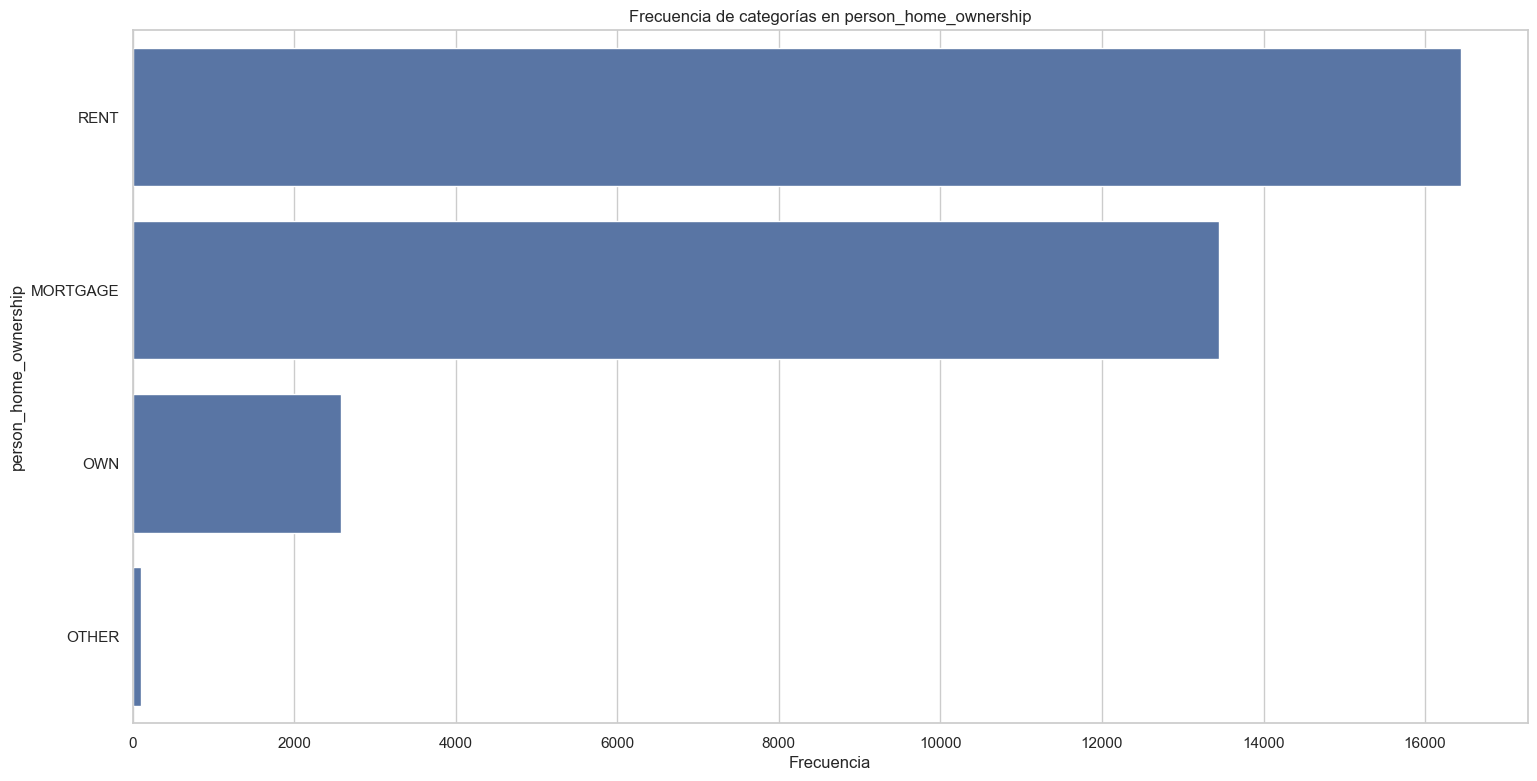

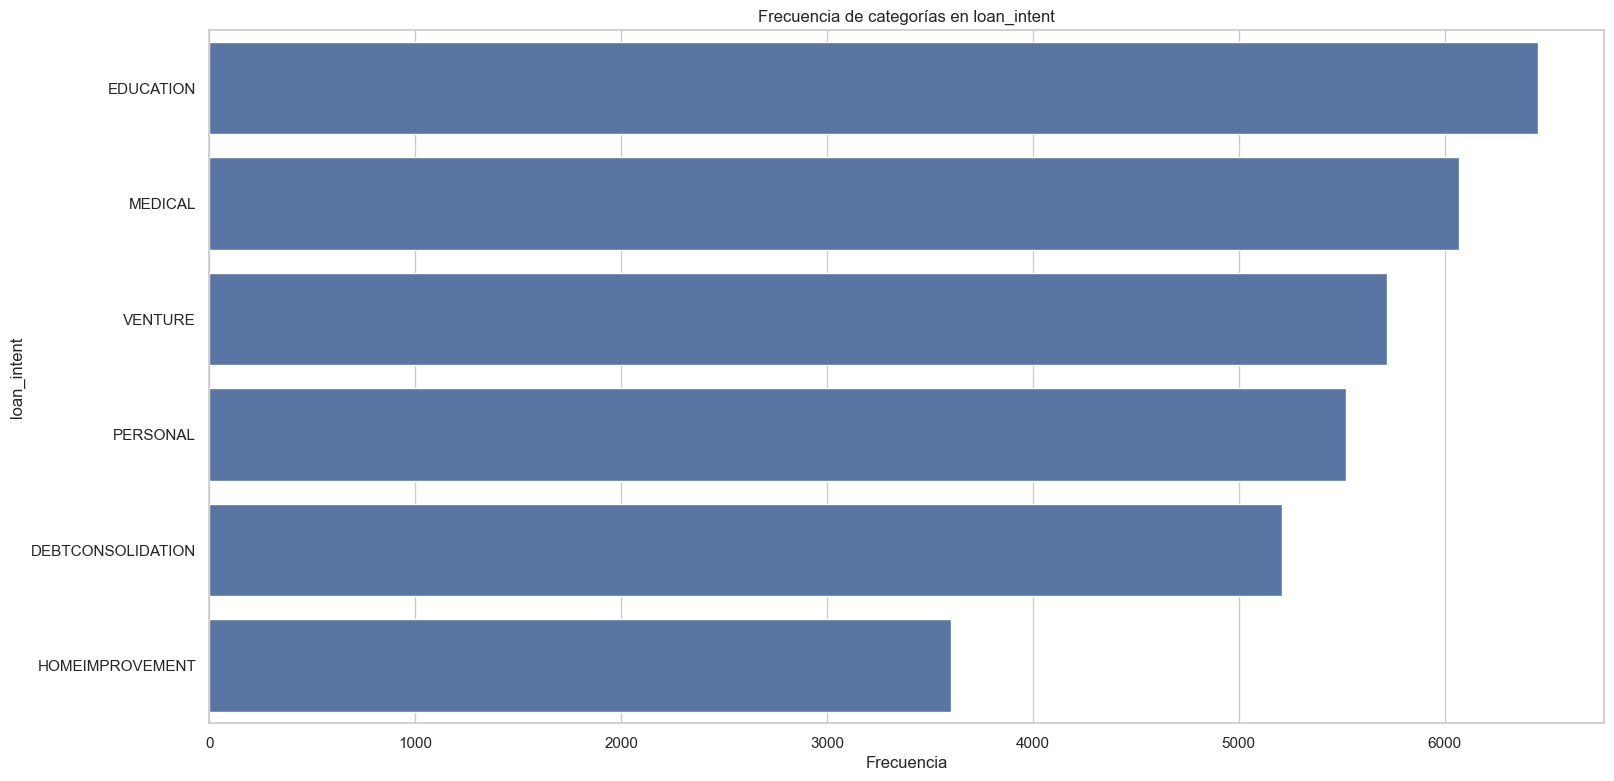

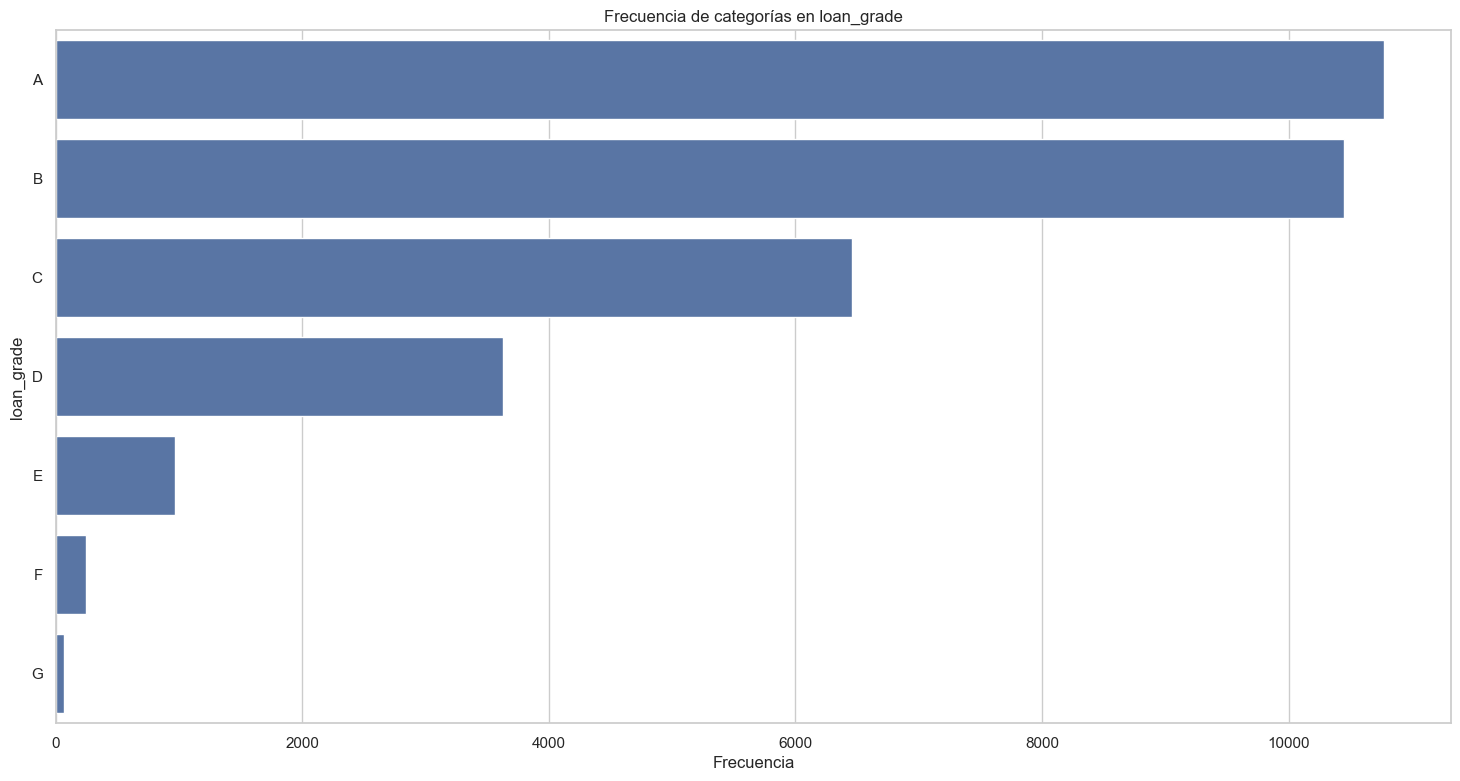

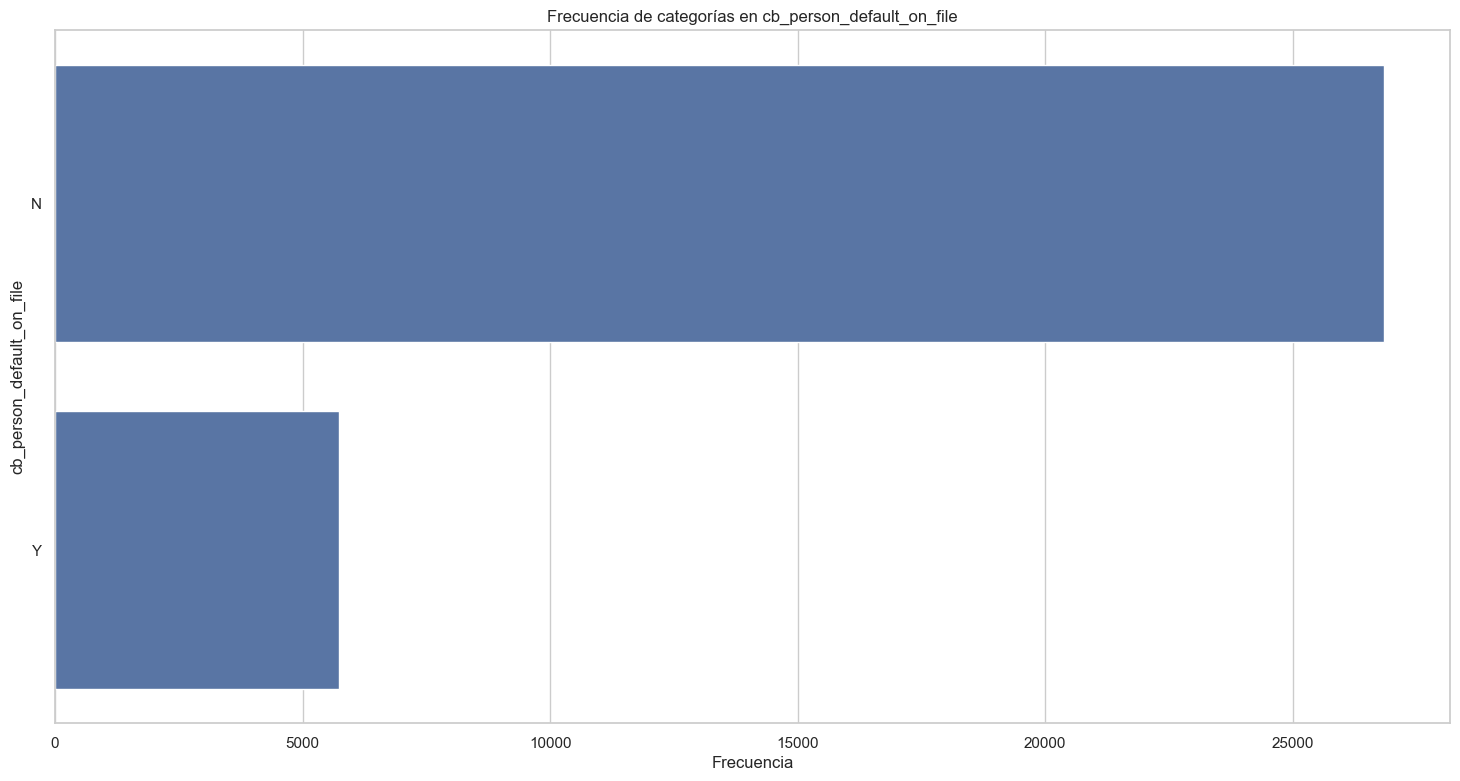

In [81]:
#Estilo de gráfico
sns.set(style="whitegrid")

# Gráficos de barras para cada variable de texto
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(18, 9))
    
    # Gráfico de recuento
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Frecuencia de categorías en {col}')
    plt.xlabel('Frecuencia')
    plt.ylabel(col)
    plt.show()

# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos:

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `loan_status`. Interpreta el resultado.

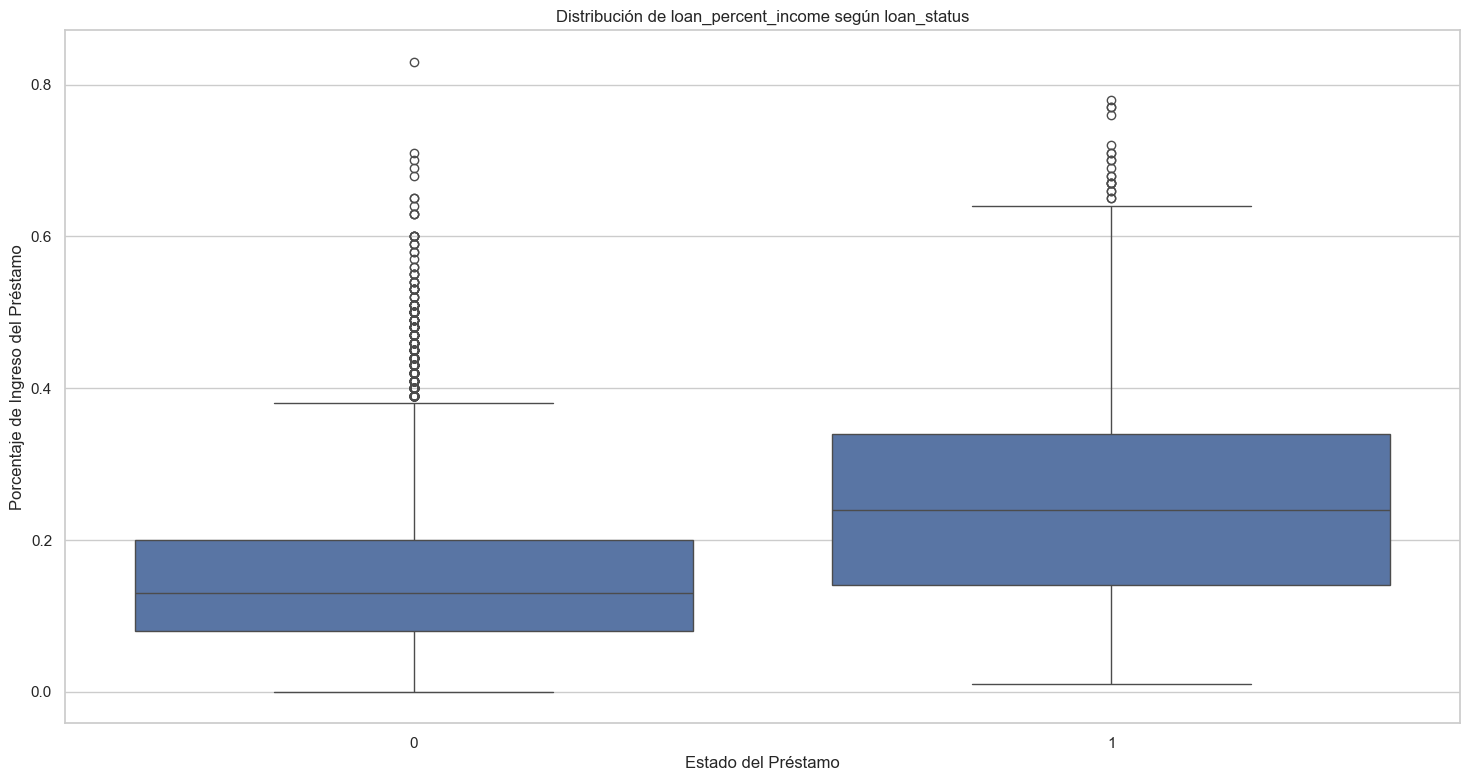

In [82]:

plt.figure(figsize=(18, 9))
sns.boxplot(x='loan_status', y='loan_percent_income', data=df)
plt.title('Distribución de loan_percent_income según loan_status')
plt.xlabel('Estado del Préstamo')
plt.ylabel('Porcentaje de Ingreso del Préstamo')
plt.show()

Interpretación del Box Plot

El eje Y representa el porcentaje de ingreso del préstamo (loan_percent_income), que indica qué proporción del ingreso se está destinando a pagos de préstamos. El eje X representa el estado del préstamo (loan_status). 

Cada caja representa el rango intercuartílico (IQR), que incluye el 50% central de los datos. La parte inferior de la caja representa el primer cuartil (Q1), y la parte superior de la caja representa el tercer cuartil (Q3). La línea dentro de la caja representa la mediana del loan_percent_income para cada grupo de loan_status. 

Los "bigotes" son las T que se observan en la gráfica y se extienden desde los cuartiles hasta el valor mínimo y máximo, excluyendo los valores atípicos. Los puntos fuera de los bigotes son valores atípicos.

Estado del Préstamo 0:
La caja correspondiente a loan_status = 0 tiene un rango intercuartílico que va de aproximadamente 0.10 a 0.20, con una mediana alrededor de 0.15. Esto indica que los prestatarios en este grupo tienden a destinar entre el 10% y el 20% de su ingreso a pagos de préstamos.

Estado del Préstamo 1:
La caja correspondiente a loan_status = 1 (préstamos en default) tiene un rango intercuartílico que se extiende desde aproximadamente 0.20 hasta 0.40, con una mediana cercana a 0.30. Esto sugiere que los prestatarios en default tienden a destinar entre el 20% y el 40% de su ingreso a pagos de préstamos, siendo el 30% el valor central.

En cuanto a los valores atípicos podemos observar una mayot cantidad en el estado '0', lo cual puede representar ocasiones especiales donde el dinero o prestamos fueron manejados de manera diferente. 

 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `load_status`, utilizando el parámetro `hue`.

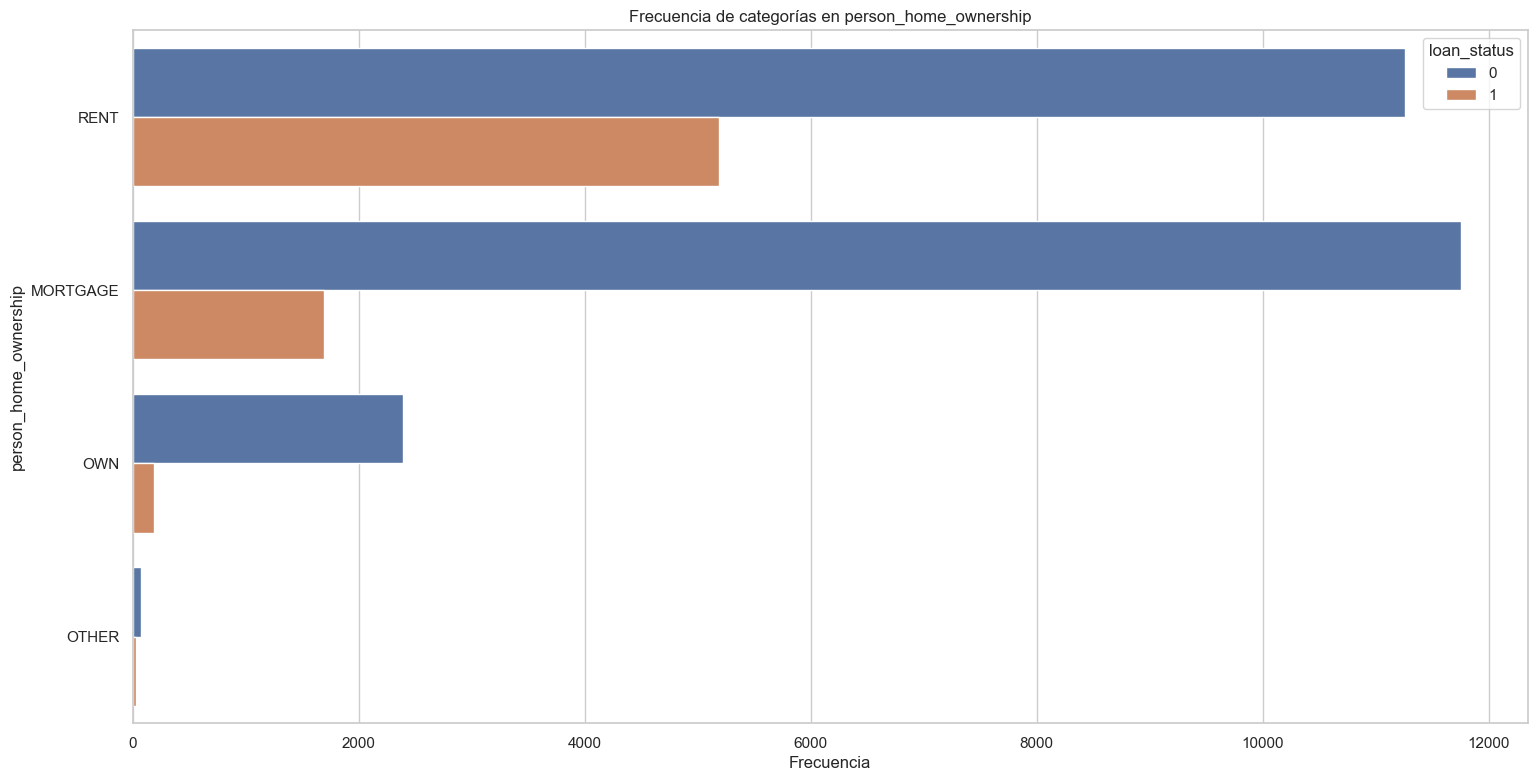

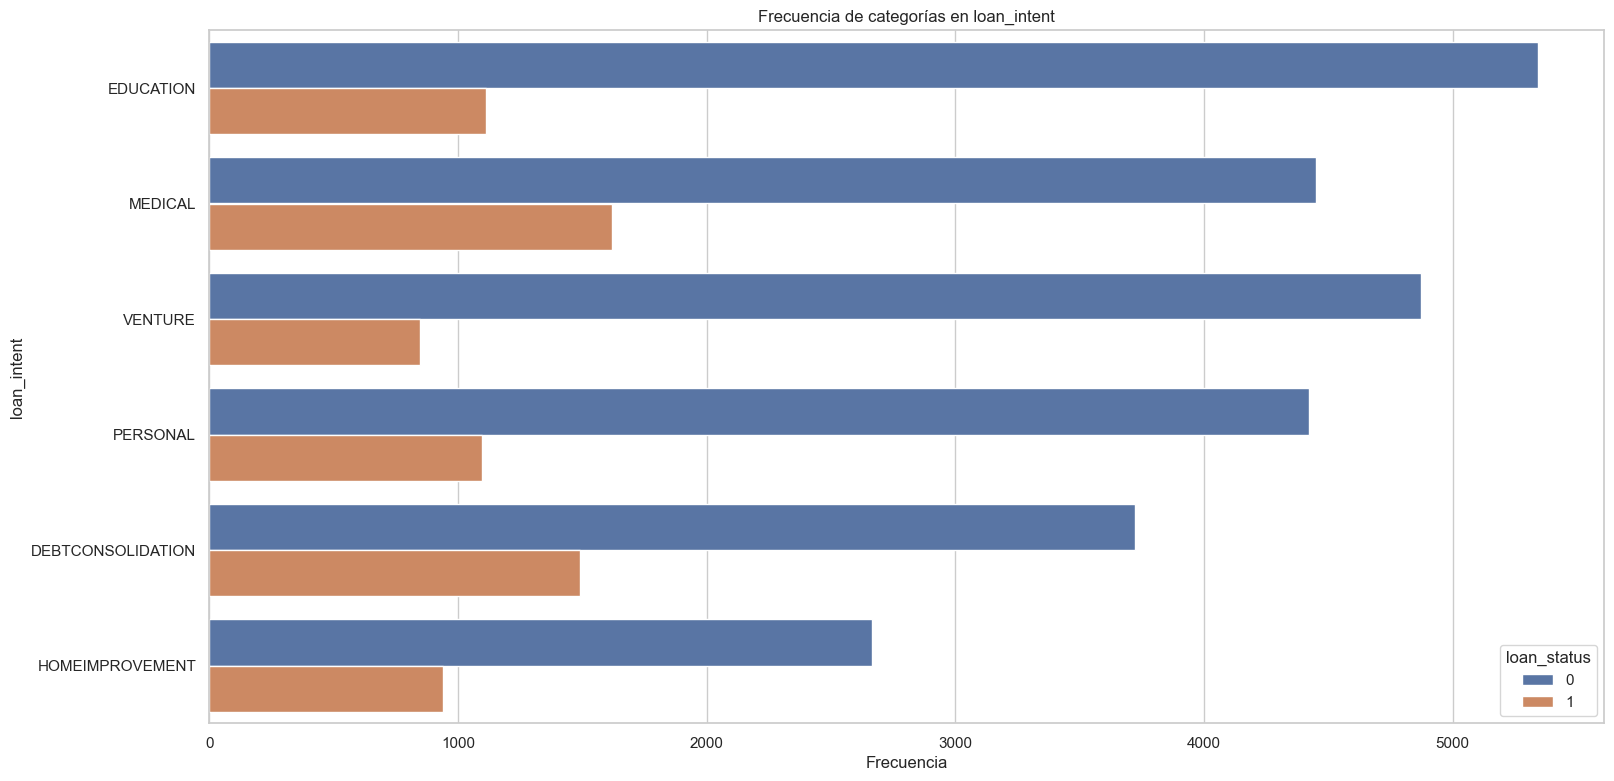

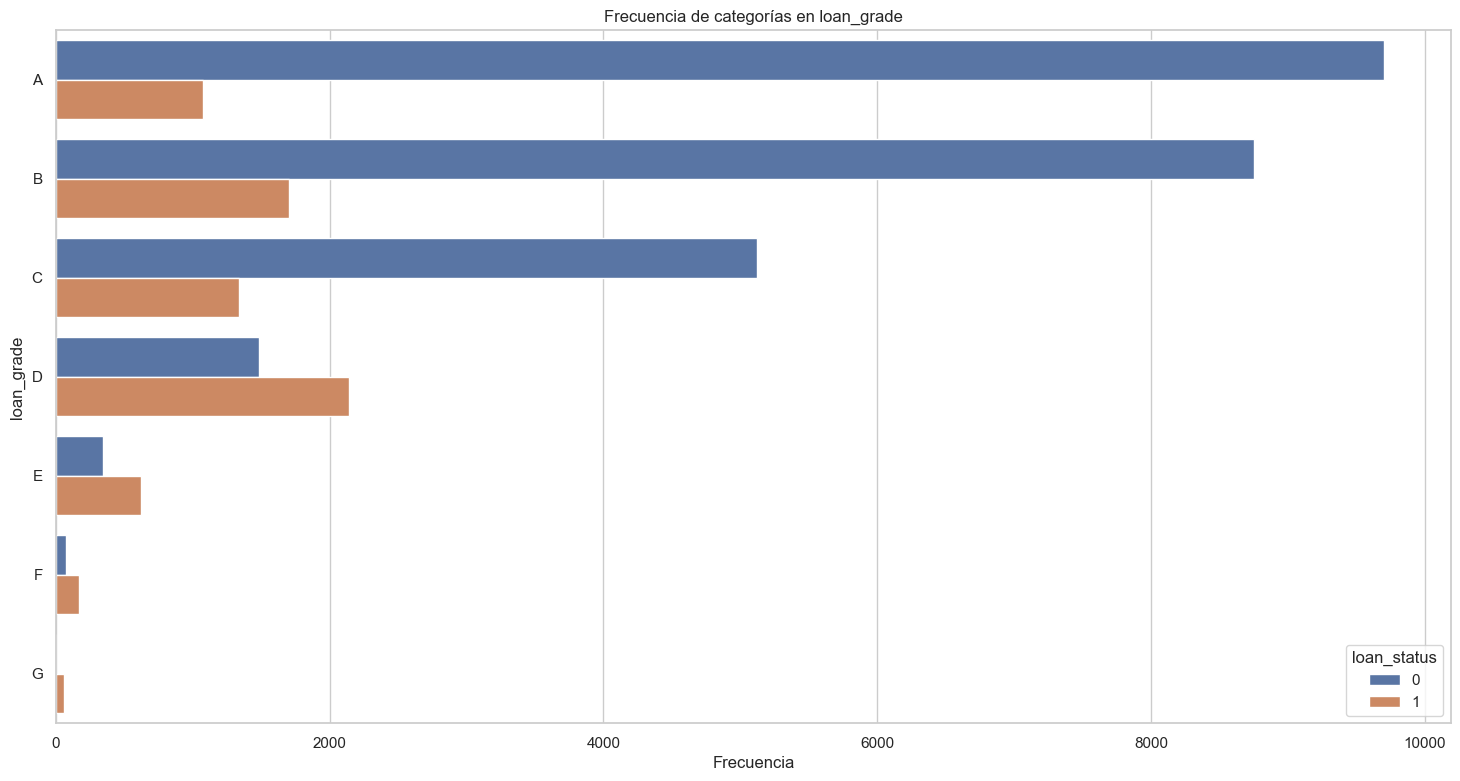

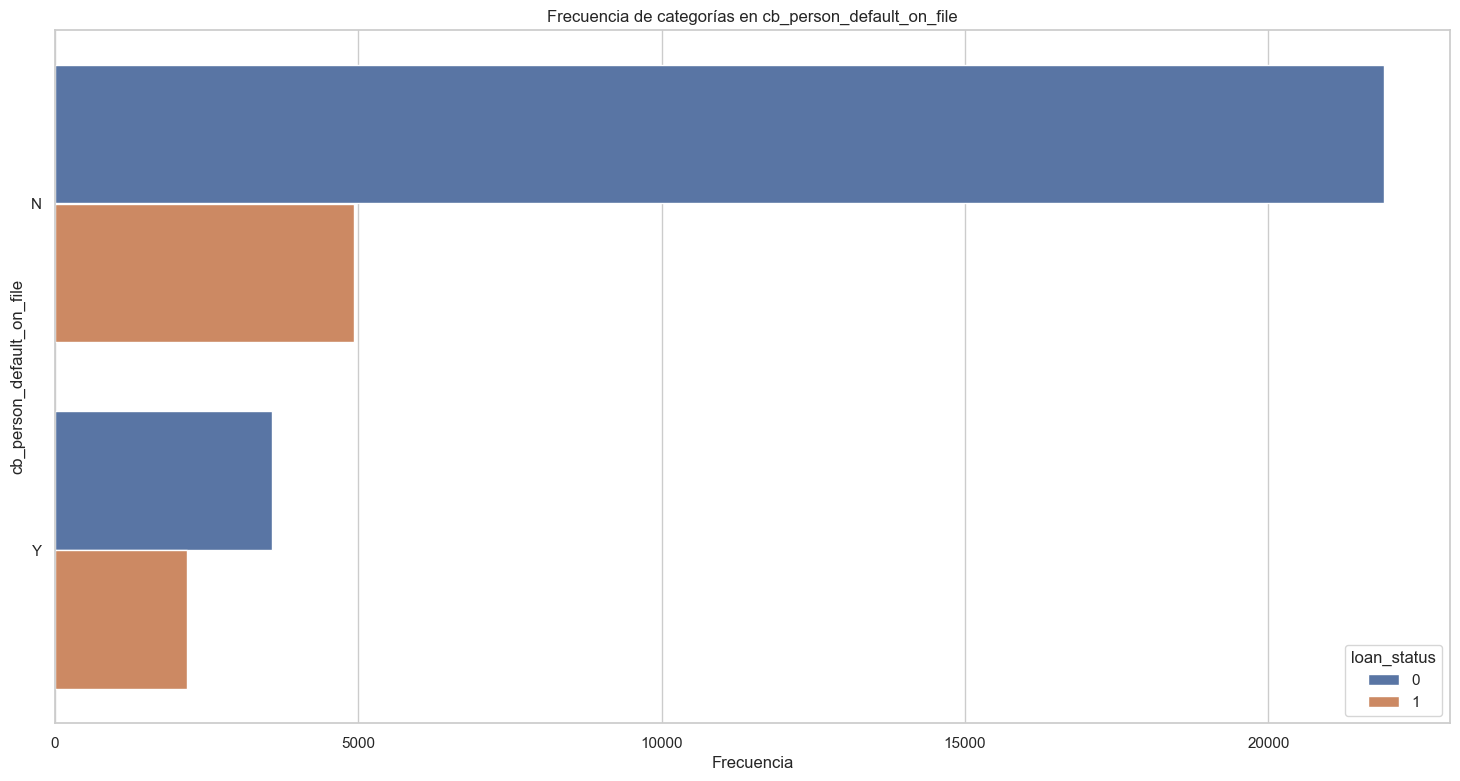

In [83]:
#Estilo de gráfico
sns.set(style="whitegrid")

# Gráficos de barras para cada variable de texto
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(18, 9))
    
    # Gráfico de recuento
    sns.countplot(y=col, data=df, hue= 'loan_status', order=df[col].value_counts().index)
    plt.title(f'Frecuencia de categorías en {col}')
    plt.xlabel('Frecuencia')
    plt.ylabel(col)
    plt.show()


10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`? `loan_percentage_income` con un 0.38.

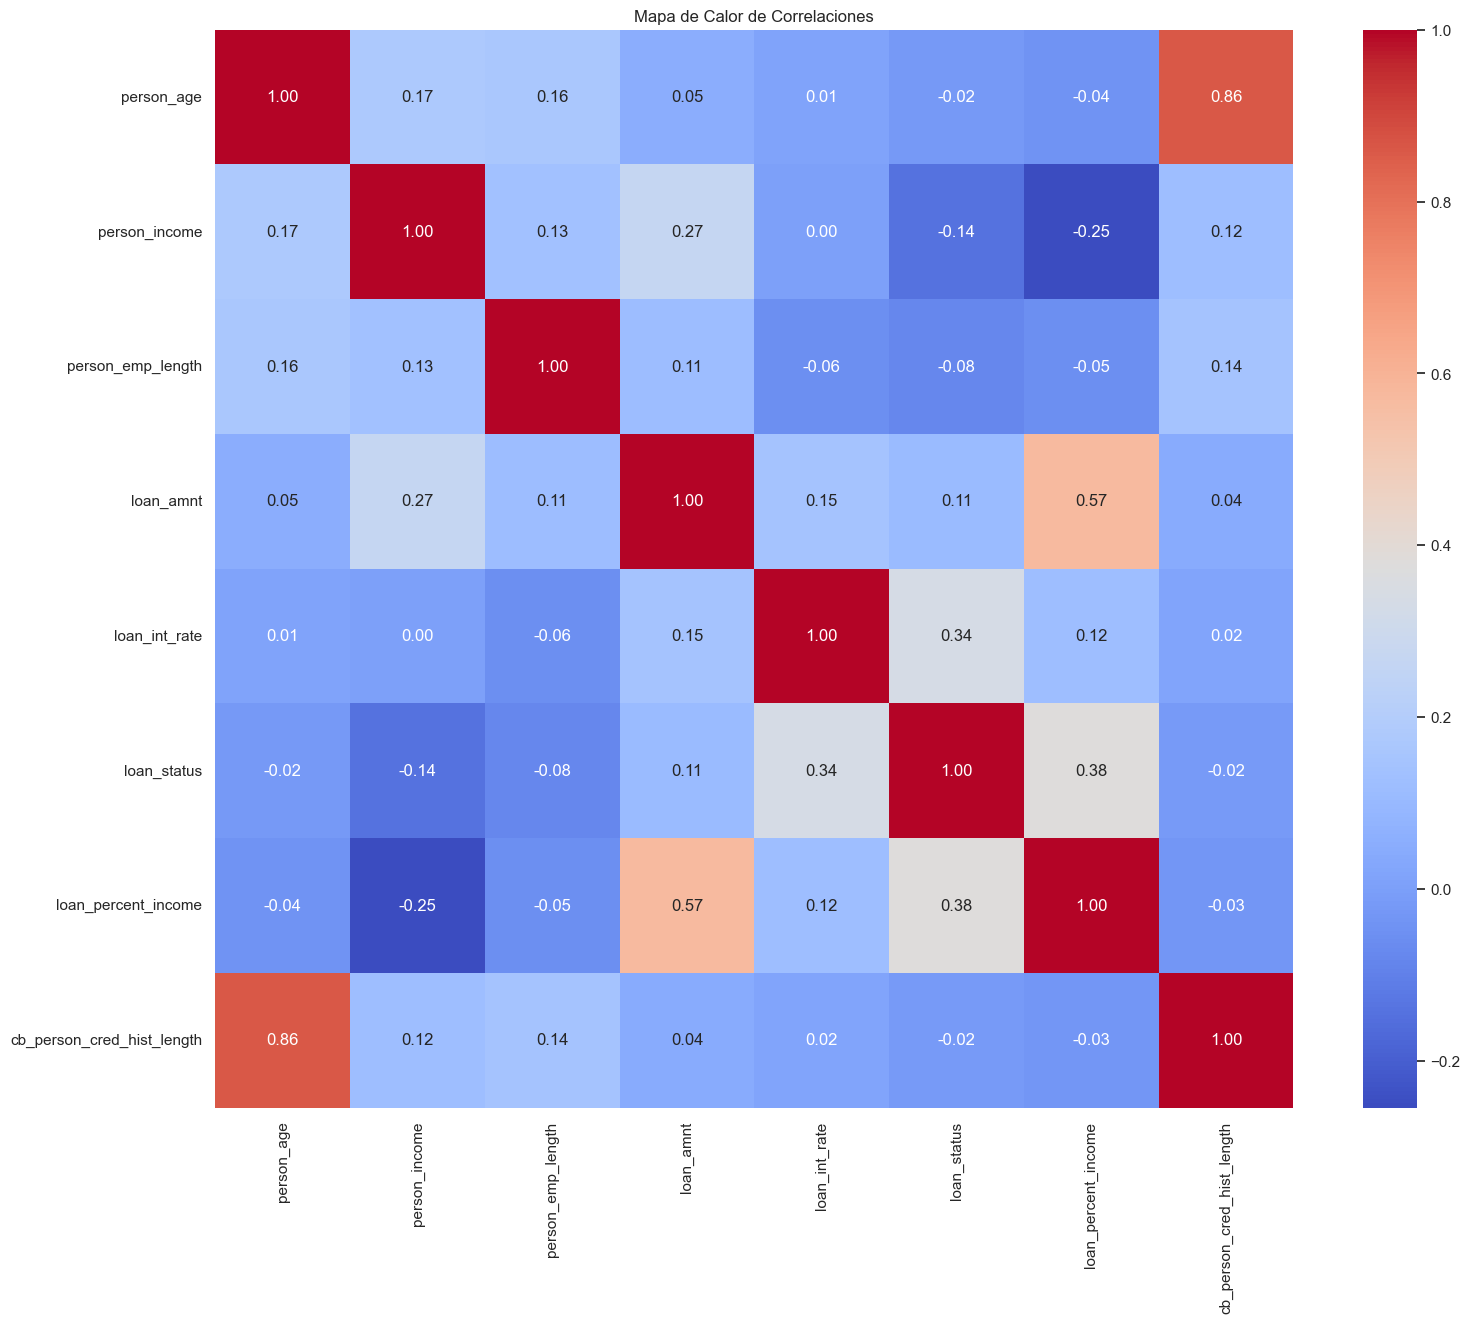

In [84]:
cm = num_df.corr() #Variable previamente utilizada con solamente columnas numéricas

# Crear el mapa de calor
plt.figure(figsize=(18, 14))
sns.heatmap(cm, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Mapa de Calor de Correlaciones')
plt.show()